In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial
import seaborn as sns
import pymc3 as pm
from tqdm import tqdm_notebook as tqdm
import theano.tensor as tt
import os

/Users/melmccurrie/anaconda3/envs/metric_py3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/melmccurrie/anaconda3/envs/metric_py3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
from psych_metric.datasets.volcano.dataset import SimulatedVolcanoMultinomial, SimulatedVolcanoMultinomialTemporal
from psych_metric.metrics.volcano.metric import VolcanoMetricMultinomialEM, VolcanoMetricMultinomialMC, VolcanoMetricMultinomialHMM

In [3]:
ROOT = os.environ['ROOT']
HERE = os.path.join(ROOT, 'psych_metric', 'metrics', 'volcano')
np.set_printoptions(suppress=True)

# Single Step

In [4]:
posterior = np.array([
    [0.8, 0.1, 0.1],
    [0.2, 0.1, 0.7],
    [0.1, 0.8, 0.1],
])
prior = np.array([0.5, 0.3, 0.2])

ds = SimulatedVolcanoMultinomial(
    posterior=posterior,
    prior=prior,
    n_annos=[15,15],
    N=500
)

### Use EM to Recover the Parameters

In [5]:
Metric = VolcanoMetricMultinomialEM(n_classes=3)

In [6]:
Metric.train(ds.X)

Divergence: 0.3701039401737532
Divergence: 0.0


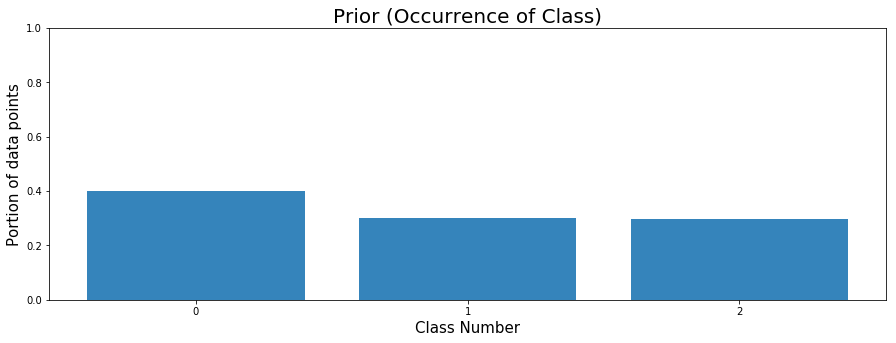

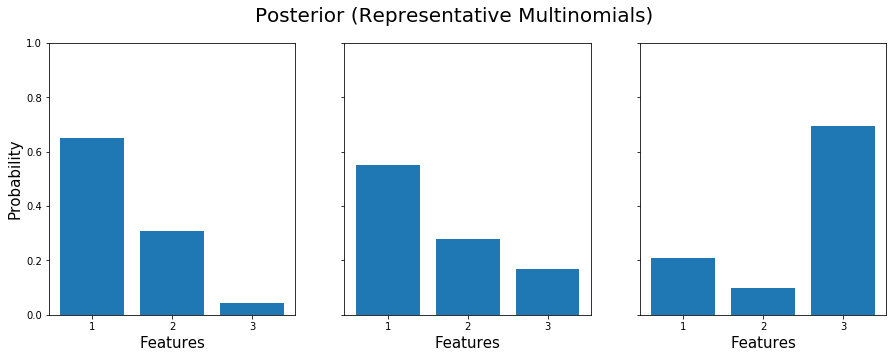

In [7]:
Metric.plot_prior()
Metric.plot_posterior()

### Use Monte Carlo Sampling to recover Parameters

In [8]:
# Metric = VolcanoMetricMultinomialMC(n_classes=3)

In [9]:
# Metric.train(ds.X)

In [10]:
# Metric.plot_posterior_pymc3()

# Temporal

In [11]:
posterior = np.array([
    [0.8, 0.1, 0.1],
    [0.2, 0.1, 0.7],
    [0.1, 0.8, 0.1],
])
prior = np.array([0.5, 0.3, 0.2])
transitions = np.array([
    [0.9, 0.05, 0.05],
    [0.05, 0.9, 0.05],
    [0.05, 0.05, 0.9],
])

ds = SimulatedVolcanoMultinomialTemporal(
    posterior=posterior,
    prior=prior,
    transitions=transitions,
    n_annos=[15,30],
    n_steps=[2,3],
    N=10
)

In [16]:
# For EM have to write custom HMMLearn module because it only accepts one multinomial sample per step instead of a multinomial distribution

In [13]:
# Metric = VolcanoMetricMultinomialHMM(n_classes=3)

In [17]:
# Metric.train(ds.X)

In [18]:
# Metric.plot_posterior_pymc3()

# Saving a Model

In [ ]:
Metric.save(os.path.join(HERE, 'model.json'))

# Load Saved Model

In [ ]:
Metric = VolcanoMetricMultinomialEM(save_file=os.path.join(HERE, 'model.json'))

# Analyze New Data

In [ ]:
posterior = np.array([
    [0.8, 0.1, 0.1],
    [0.2, 0.1, 0.7],
    [0.1, 0.8, 0.1],
])
prior = np.array([0.5, 0.3, 0.2])

ds = SimulatedVolcanoMultinomial(
    posterior=posterior,
    prior=prior,
    n_annos=[15,15],
    N=5
)

new_data = ds.X

In [ ]:
new_data

In [ ]:
# calculate prob of each class
Metric.predict_proba(new_data)

In [ ]:
# calculate which class (argmax of probs)
Metric.predict(new_data)